In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('./EEG_data.csv')
data = pd.read_csv('./demographic_info.csv')

In [5]:
data = data.rename(columns={'subject ID': 'SubjectID',
                   ' gender': 'gender', ' age': 'age', ' ethnicity': 'ethnicity'})
df = df.merge(data, how='inner', on='SubjectID')
# df.head()

In [6]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})
df['ethnicity'] = df['ethnicity'].replace(
    {'Han Chinese': 0, 'Bengali': 1, 'English': 2})
df.drop(columns=['SubjectID', 'VideoID', 'predefinedlabel'], inplace=True)

In [42]:
df.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln', 'age',
       'ethnicity', 'gender'],
      dtype='object')

In [7]:
top_fea = df.drop(['user-definedlabeln'], axis=1)

In [8]:
top_fea.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [24]:
from sklearn.model_selection import train_test_split
y = df['user-definedlabeln']
X = df.drop(columns=['user-definedlabeln'])
X_train, x_test, Y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.27)

In [25]:
scaler = StandardScaler()
svm_classifier = SVC()

pipeline = make_pipeline(scaler, svm_classifier)

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [47]:
y_test.head()

772      1.0
10196    0.0
385      1.0
4269     0.0
8        0.0
Name: user-definedlabeln, dtype: float64

In [50]:

received_array = np.array([41.0,78.0,195.0,2508980.0,474498.0,344011.0,154192.0,52440.0,98050.0,241122.0,31639.0,25,0,1])
# Convert the array into a DataFrame with the same structure
columns_to_select = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'ethnicity', 'gender']
# Create a new DataFrame with the selected columns
received_dataframe = pd.DataFrame(data=[received_array], columns=columns_to_select)
# received_dataframe
X_new = received_dataframe
X_new_standardized = scaler.transform(X_new)
predictions = svm_classifier.predict(X_new_standardized)
predictions


,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity,gender
0,41.0,78.0,195.0,2508980.0,474498.0,344011.0,154192.0,52440.0,98050.0,241122.0,31639.0,25.0,0.0,1.0


In [33]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6562590344030067

In [12]:
svm_classifier = SVC(random_state=108)

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

SVC(random_state=108)

In [13]:
x_test[0]

array([ 0.97987563,  0.1684983 , -0.08959854, -0.93314852, -0.65267619,
       -0.37604732, -0.4958067 , -0.39539046, -0.40705946, -0.33220337,
       -0.33576709,  2.53509449,  2.64911251,  0.50156067])

In [14]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


confidence_scores = svm_classifier.decision_function([[ 0.97987563,  0.1684983 , -0.08959854, -0.93314852, -0.65267619,
       -0.37604732, -0.4958067 , -0.39539046, -0.40705946, -0.33220337,
       -0.33576709,  2.53509449,  2.64911251,  0.50156067]])

confidence_percentages = sigmoid(confidence_scores)
confidence_percentages *= 100
print("Confidence Percentages:\n", confidence_percentages)

Confidence Percentages:
 [42.63110374]


In [15]:
predictions = svm_classifier.predict(x_test).astype(int)
predictions

array([0, 1, 1, ..., 0, 0, 0])

In [16]:
x_test[1]

array([ 0.11602122, -0.31704376, -0.38229075, -0.2818015 , -0.47452978,
       -0.28124971, -0.41765788, -0.26612432, -0.40871637, -0.35501627,
       -0.36229772, -0.63941983, -0.47031213,  0.50156067])

In [17]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.66493206128939

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

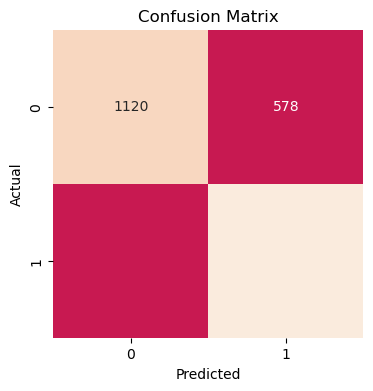

In [19]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [20]:
import joblib

joblib.dump(svm_classifier, 'svm_model.joblib')

['svm_model.joblib']

In [21]:
from sklearn.preprocessing import StandardScaler
data = [[40.0, 35.0, -50.0, 73787.0, 28083.0, 1439.0,
         2240.0, 2746.0, 3687.0, 5293.0, 2740.0, 25, 0, 1]]
scaler = StandardScaler()
X = scaler.fit_transform(data)
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
import numpy as np

svm_classifier_model = joblib.load('svm_model.joblib')
data = [-0.05674966, -0.5377447, -0.19329521, -0.83437793, -0.57335209,
        -0.55151816, -0.53065383, -0.56209974, -0.43582135, -0.30441698,
        -0.32402812, -0.18591779, -0.47031213,  0.50156067]
x_test_array = np.array(data)
pred = svm_classifier_model.predict(x_test_array.reshape(1, -1))
pred

array([0.])

## Testing server


In [23]:
from flask import Flask, request, jsonify
from flask_cors import CORS
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


app = Flask(__name__)
CORS(app)


@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    return jsonify({'data': data})


if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


## Final response


In [36]:
from flask import Flask, request, jsonify
import numpy as np
import joblib
from flask_cors import CORS

svm_classifier = joblib.load('svm_model.joblib')

app = Flask(__name__)
CORS(app)


@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    x_test = data['features']
    received_array = np.array(x_test)
    columns_to_select = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'ethnicity', 'gender']
    received_dataframe = pd.DataFrame(data=[received_array], columns=columns_to_select)
    X_new = received_dataframe
    X_new_standardized = scaler.transform(X_new)
    prediction = svm_classifier.predict(X_new_standardized).astype(int)[0]

    confidence_scores = svm_classifier.decision_function(X_new_standardized)
    confidence_percentage = round(float(sigmoid(confidence_scores) * 100),2)

    return jsonify({'prediction': prediction.tolist(), 'confidence': confidence_percentage})


if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Feb/2024 21:27:32] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 21:27:32] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 21:27:54] "POST /predict HTTP/1.1" 200 -
